In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x=df.iloc[:,0:8]
y=df["Outcome"]
obj=StandardScaler()
x=obj.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [ ]:
model=models.Sequential()
model.add(layers.Dense(100,activation="relu"))
#model.add(layers.Dense(75,activation="relu"))
model.add(layers.Dense(50,activation="relu"))
#model.add(layers.Dense(25,activation="relu"))
model.add(layers.Dense(12,activation="relu"))
model.add(layers.Dense(8,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))


In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"],)
history=model.fit(x_train,y_train,epochs=50, validation_data=(x_test,y_test))
result=model.evaluate(x_test,y_test)

Epoch 1/50
22/22 [==============================] - 1s 12ms/step - loss: 0.6625 - accuracy: 0.6353 - val_loss: 0.6229 - val_accuracy: 0.6753
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 0.5849 - accuracy: 0.7323 - val_loss: 0.5567 - val_accuracy: 0.7403
Epoch 3/50
22/22 [==============================] - 0s 3ms/step - loss: 0.5199 - accuracy: 0.7656 - val_loss: 0.5144 - val_accuracy: 0.7532
Epoch 4/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4814 - accuracy: 0.7786 - val_loss: 0.5093 - val_accuracy: 0.7143
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4619 - accuracy: 0.7771 - val_loss: 0.5125 - val_accuracy: 0.7013
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4495 - accuracy: 0.7844 - val_loss: 0.5082 - val_accuracy: 0.7013
Epoch 7/50
22/22 [==============================] - 0s 4ms/step - loss: 0.4451 - accuracy: 0.7786 - val_loss: 0.4990 - val_accuracy: 0.7143
Epoch 8/50
22/22 [=

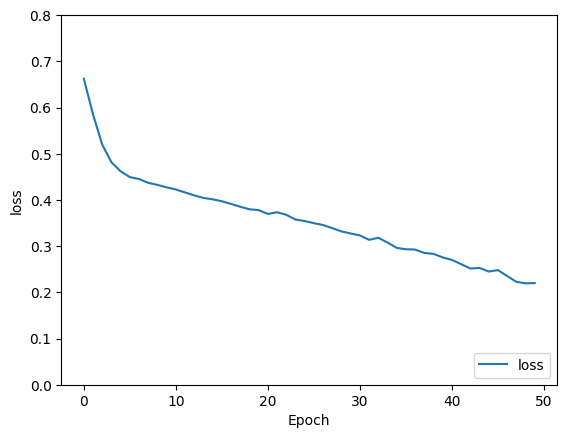

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 0.8])
plt.legend(loc='lower right')

3/3 - 0s - loss: 0.7478 - accuracy: 0.6494 - 28ms/epoch - 9ms/step


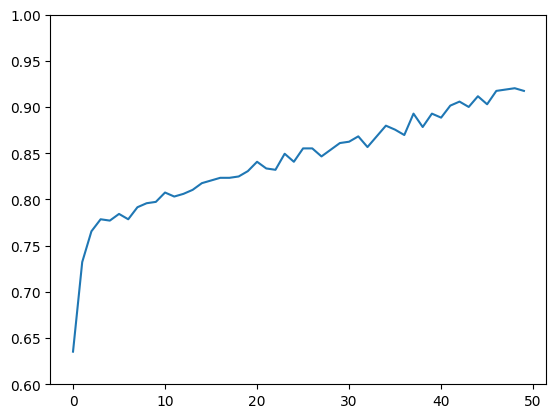

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
plt.ylim([0.6,1])
plt.plot(history.history['accuracy'], label = 'accuracy')
